In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files
uploaded=files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [4]:
df=pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,1/4/2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501200
1,1/4/2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.897040
2,1/4/2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.089800
3,1/4/2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925300
4,1/4/2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103760
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


Descriptive Analytics for Numerical Columns

 Identify numerical columns

In [6]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

Calculate mean, median, mode, and standard deviation

In [7]:
desc_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Mode': df[numerical_cols].mode().iloc[0],
    'Std_Dev': df[numerical_cols].std()
})

In [8]:
print("Descriptive Statistics for Numerical Columns:")
print(desc_stats)

Descriptive Statistics for Numerical Columns:
                           Mean       Median          Mode       Std_Dev
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


Data Visualization

 Histograms for numerical columns

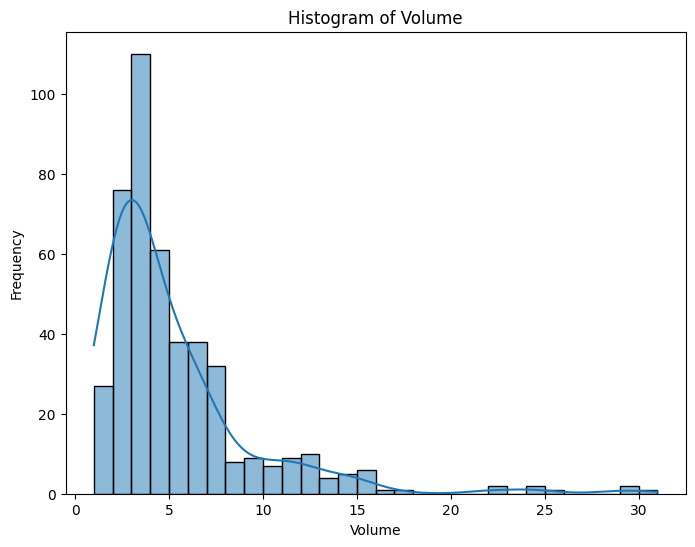

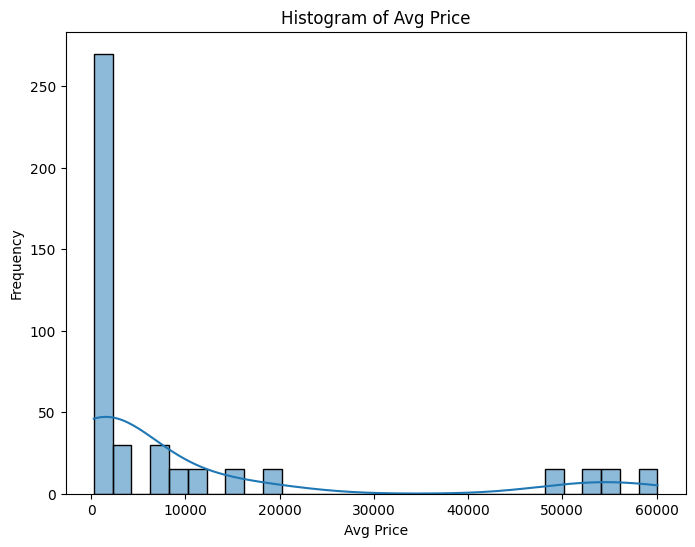

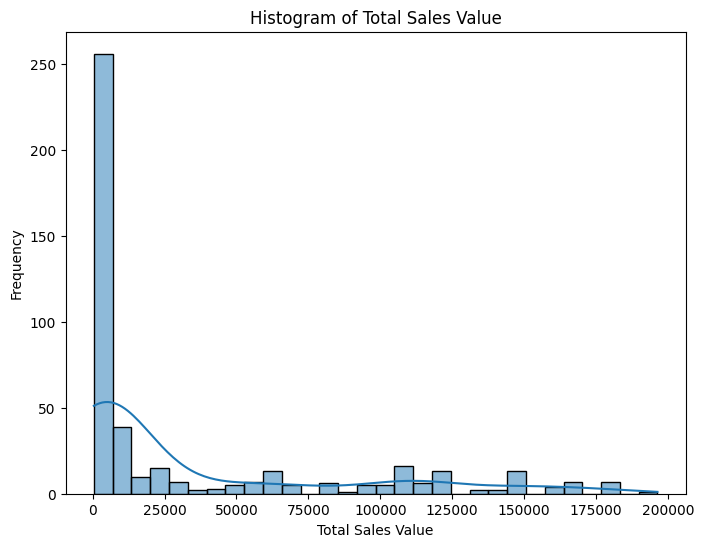

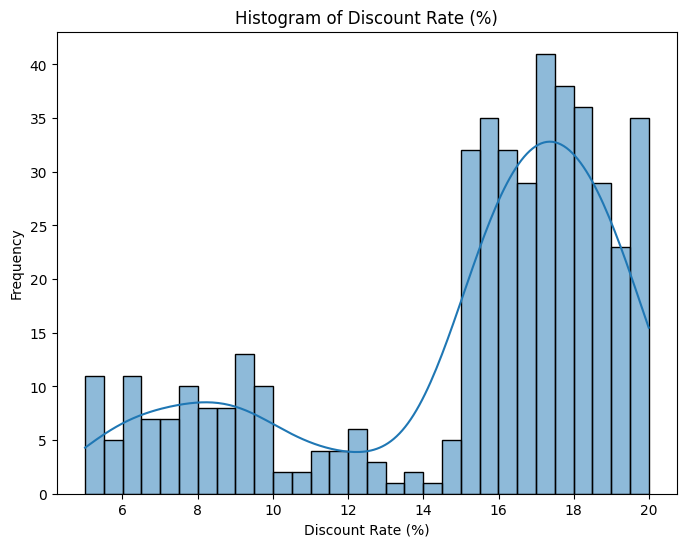

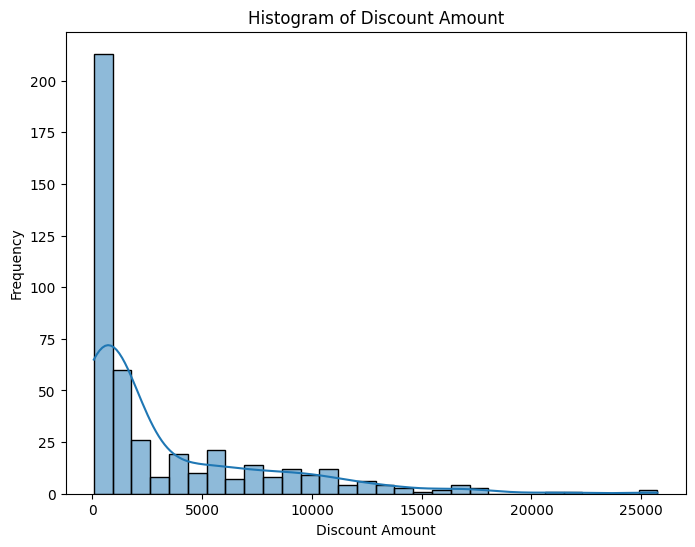

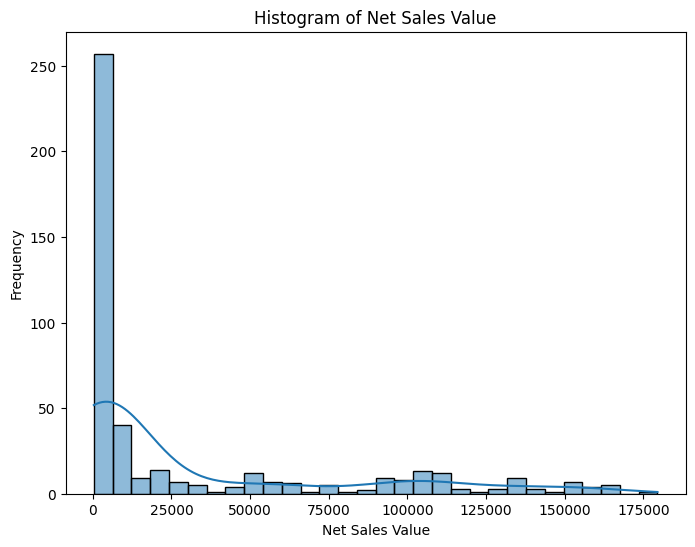

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

 Boxplots for numerical columns

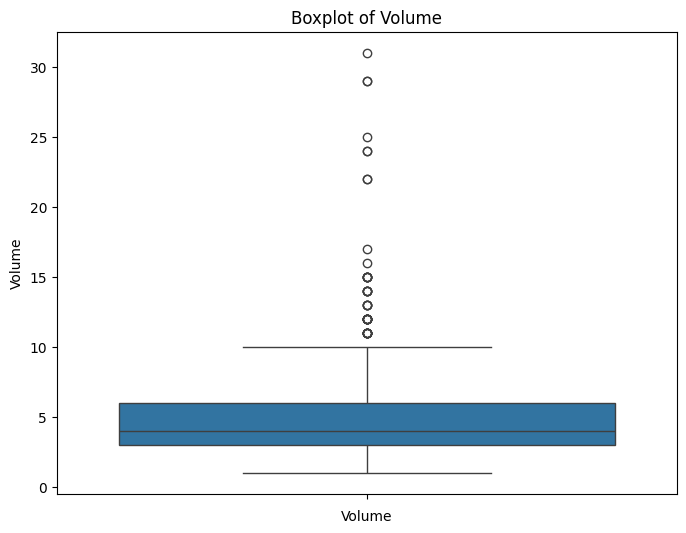

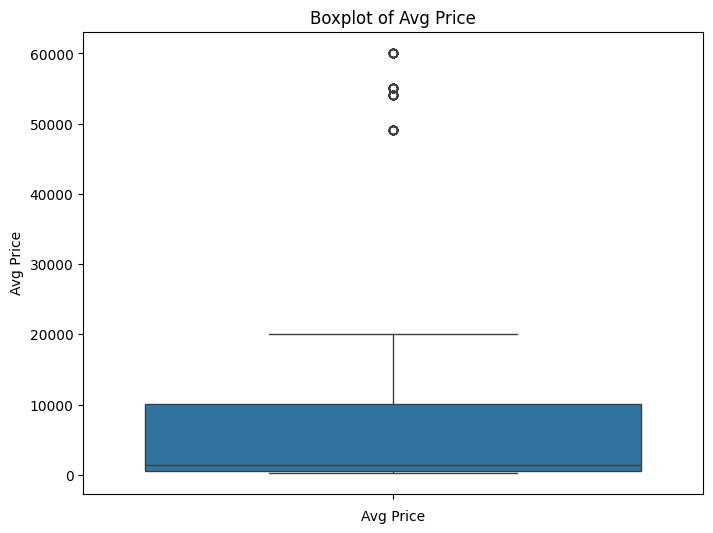

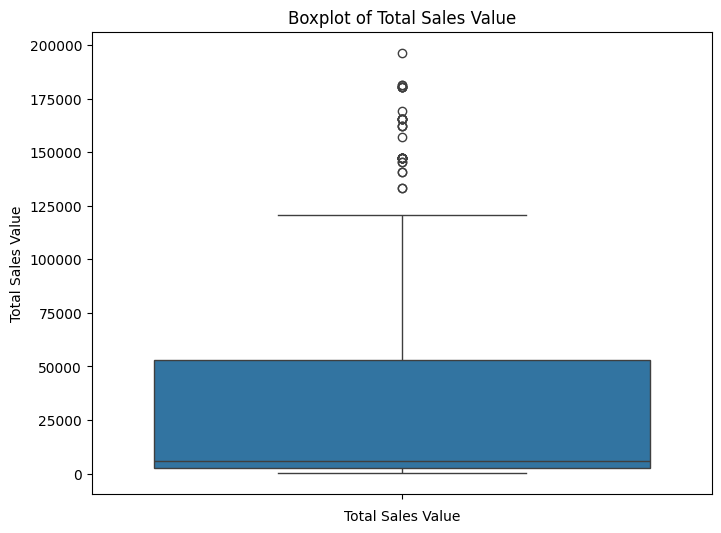

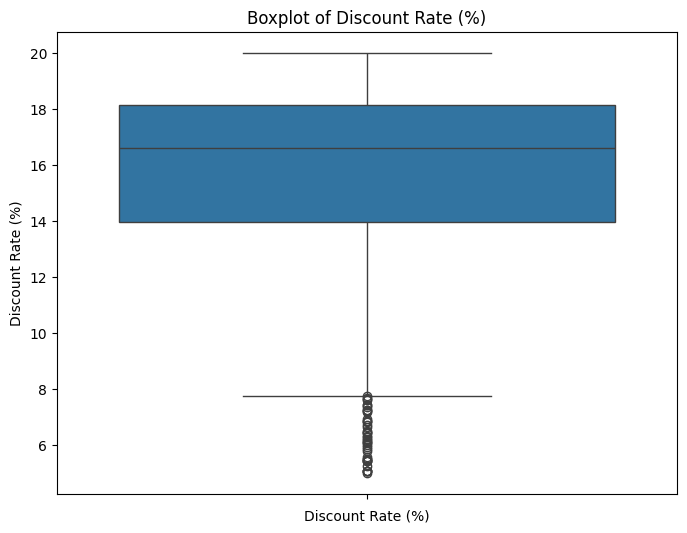

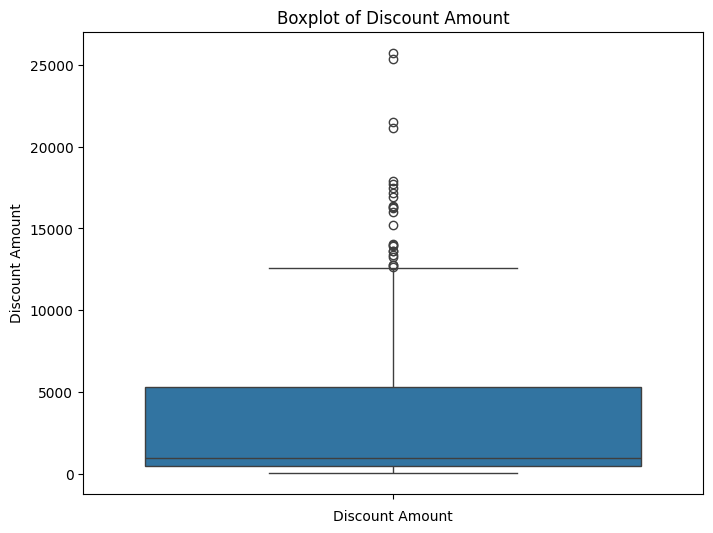

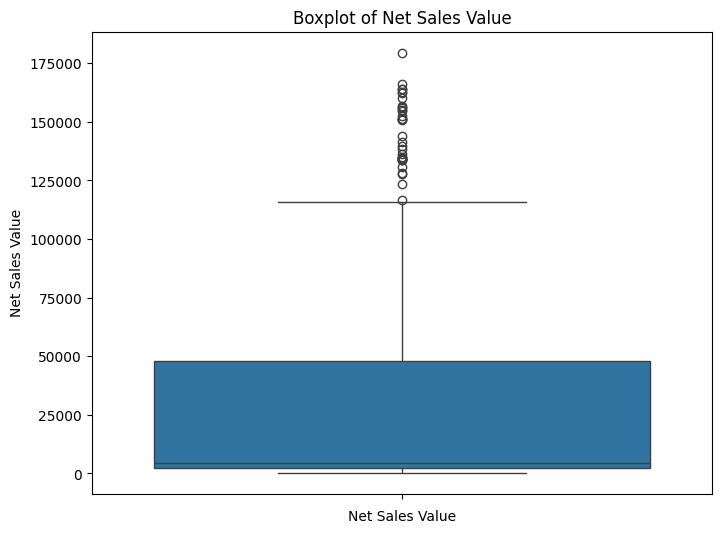

In [10]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


Bar Chart for Categorical Columns

 Identify categorical columns

In [12]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

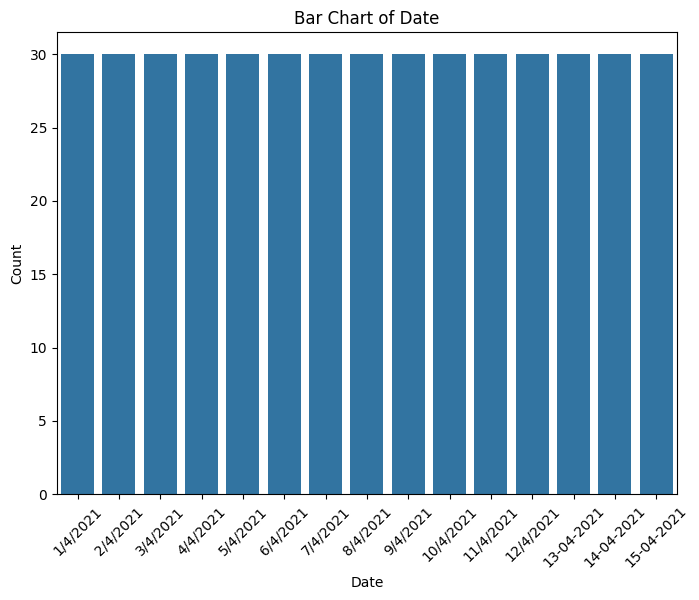

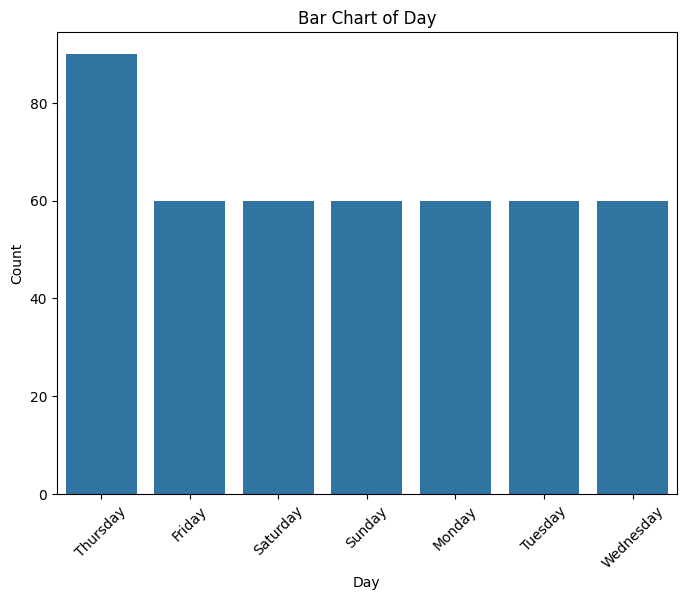

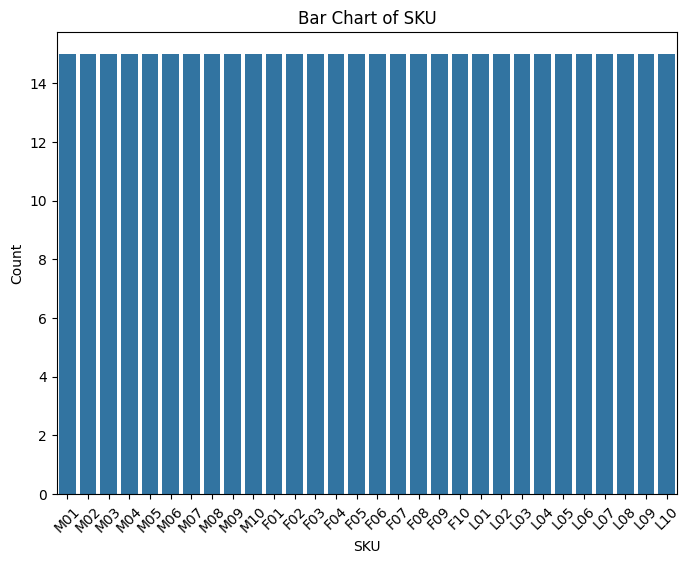

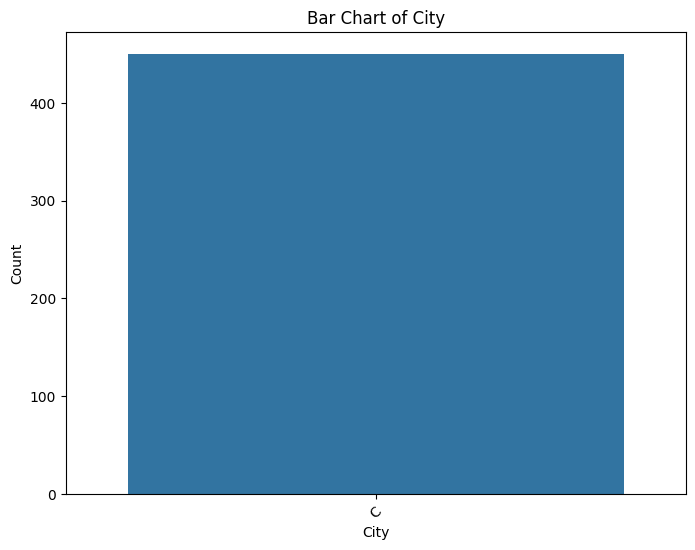

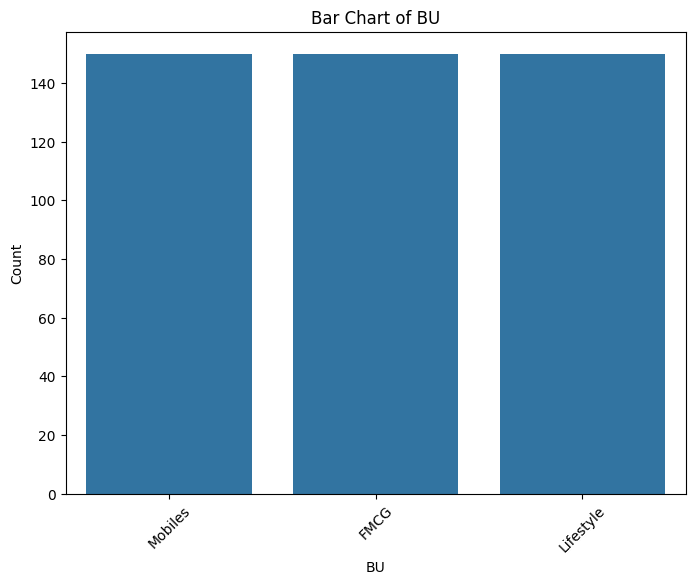

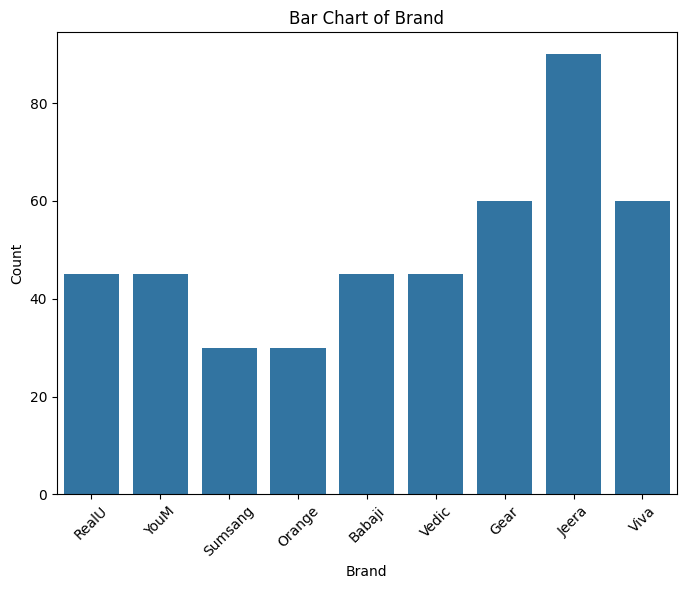

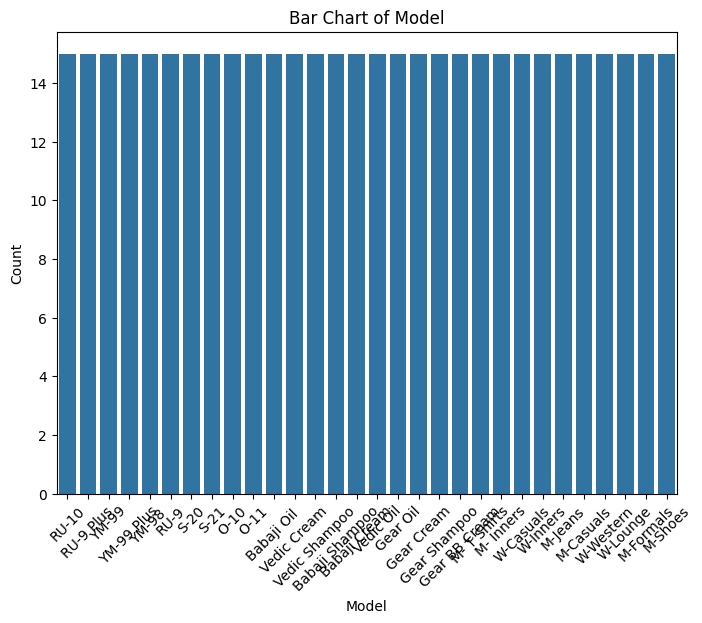

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Standardization of Numerical Variables (Z-Score Normalization)

In [14]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Compare original and standardized data distributions

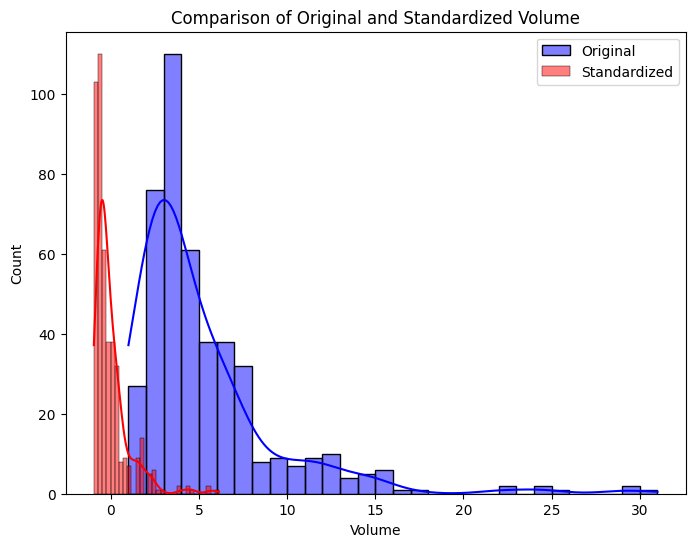

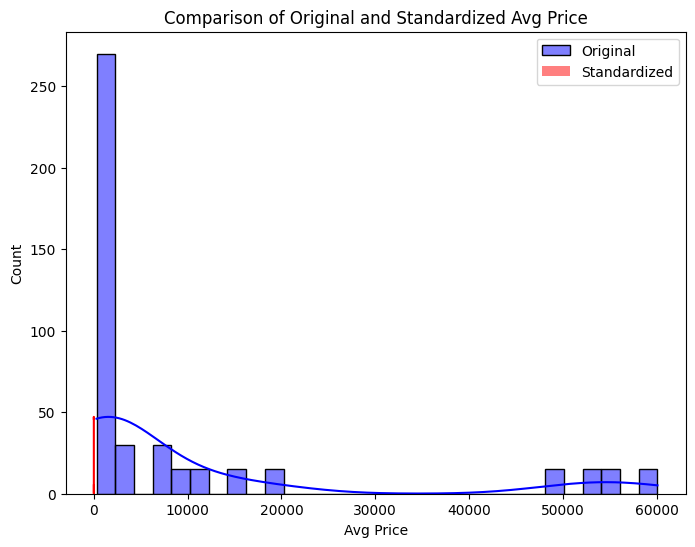

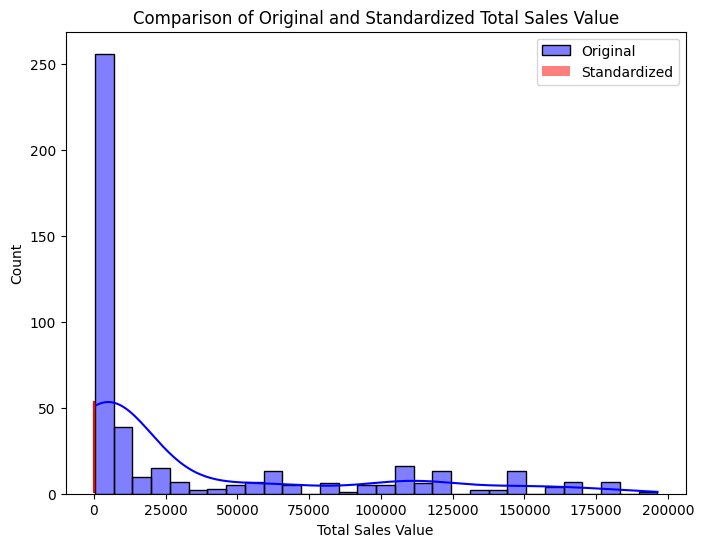

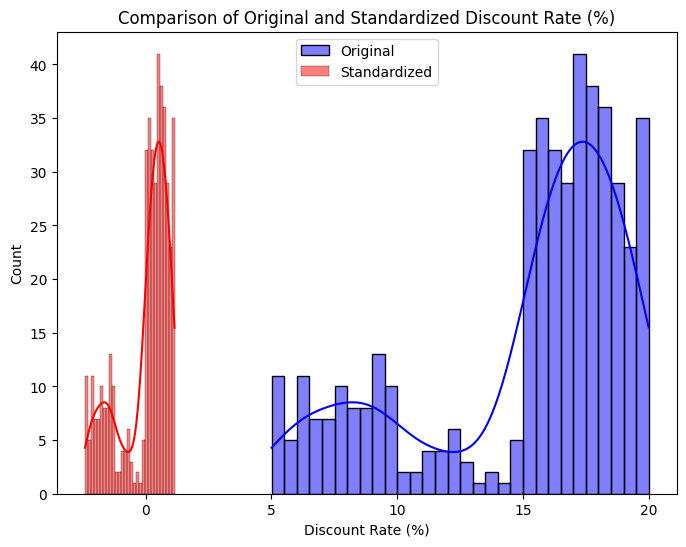

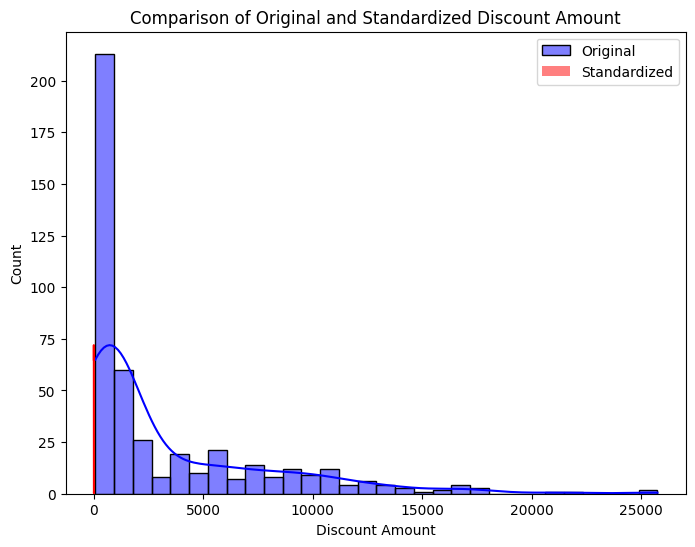

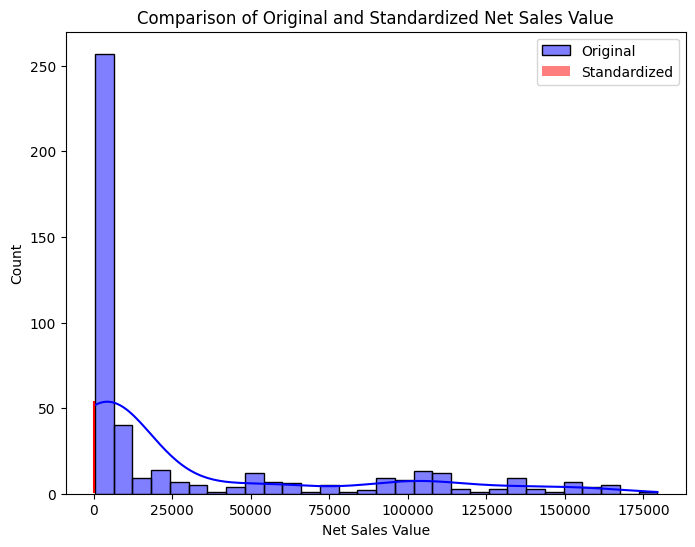

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='blue', label='Original', bins=30)
    sns.histplot(df_scaled[col], kde=True, color='red', label='Standardized', bins=30)
    plt.title(f'Comparison of Original and Standardized {col}')
    plt.legend()
    plt.show()


Conversion of Categorical Data into Dummy Variables (One-Hot Encoding)

In [17]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_10/4/2021,Date_11/4/2021,Date_12/4/2021,Date_13-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501200,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102960,89323.897040,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910160,102042.089800,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925300,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103760,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
print("Dataset with One-Hot Encoding (first 5 rows):")
print(df_encoded.head())


Dataset with One-Hot Encoding (first 5 rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102960   
2       7      16100             112700           9.456886     10657.910160   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_10/4/2021  Date_11/4/2021  Date_12/4/2021  \
0     160346.50120           False           False           False   
1      89323.89704           False           False           False   
2     102042.08980           False           False           False   
3     112235.92530           False           False           False   
4      19927.05377           False           False           False   

   Date_13-04-2021  ...  Model_Vedic Cream  Model_Vedic Oi


 Conclusion

In [19]:
print("\nSummary of the Analysis:")
print("1. Basic descriptive statistics were computed for all numerical columns.")
print("2. Histograms and boxplots revealed the distribution and presence of outliers in numerical data.")
print("3. Categorical variables were visualized using bar charts.")
print("4. Numerical variables were standardized for uniformity using Z-score normalization.")
print("5. Categorical variables were successfully transformed into dummy variables for further analysis.")



Summary of the Analysis:
1. Basic descriptive statistics were computed for all numerical columns.
2. Histograms and boxplots revealed the distribution and presence of outliers in numerical data.
3. Categorical variables were visualized using bar charts.
4. Numerical variables were standardized for uniformity using Z-score normalization.
5. Categorical variables were successfully transformed into dummy variables for further analysis.
